In [1]:

import numpy as np
import pandas as pd
df=pd.read_csv('direct_reports_dataset.csv')
print(df[:10])
print("Shape of the data:",df.shape)
print("Column names:",df.columns)
print("Data types of each column:")
print(df.dtypes)
print()
print("null values:",df.isnull().sum())
print(f"Duplicates: {df.duplicated().sum()}")
print()
print(df.describe())



   employee_id                  position  managers_id
0         1001         Analytics Manager       1013.0
1         1002             Data Engineer       1007.0
2         1003             Data Engineer       1001.0
3         1004        Database Developer       1017.0
4         1005              Data Analyst       1001.0
5         1006             Data Engineer       1017.0
6         1007  Data Engineering Manager       1013.0
7         1008        Database Developer       1001.0
8         1009             Data Engineer       1007.0
9         1010            Data Scientist       1017.0
Shape of the data: (100, 3)
Column names: Index(['employee_id', 'position', 'managers_id'], dtype='object')
Data types of each column:
employee_id      int64
position        object
managers_id    float64
dtype: object

null values: employee_id    0
position       0
managers_id    4
dtype: int64
Duplicates: 0

       employee_id  managers_id
count   100.000000    96.000000
mean   1845.110000  1009.729167

Task 2-EDA

In [2]:
managers = df[df['position'].str.contains("Manager")]
print(managers)
x=df['managers_id'].value_counts().reset_index()
print(x)


    employee_id                  position  managers_id
0          1001         Analytics Manager       1013.0
6          1007  Data Engineering Manager       1013.0
16         1017      Data Science Manager       1013.0
28         2010  Data Engineering Manager       1013.0
30         2012         Analytics Manager       1013.0
31         2013      Data Science Manager       1013.0
32         2014      Data Science Manager       1013.0
33         2015         Analytics Manager       1013.0
37         2019      Data Science Manager       1013.0
38         2020  Data Engineering Manager       1013.0
41         2023  Data Engineering Manager       1013.0
44         2026      Data Science Manager       1013.0
62         2044      Data Science Manager       1013.0
72         2054         Analytics Manager       1013.0
73         2055  Data Engineering Manager       1013.0
83         2065      Data Science Manager       1013.0
86         2068         Analytics Manager       1013.0
89        

In [3]:
most_direct_report = x.loc[x['count'].idxmax()]

print(most_direct_report)

managers_id    1017.0
count            28.0
Name: 0, dtype: float64


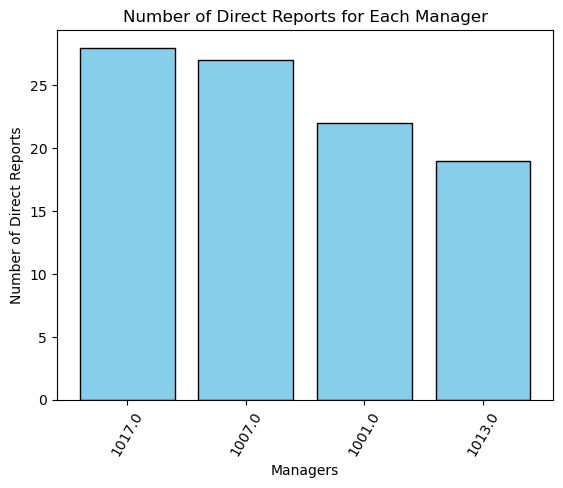

In [4]:
import matplotlib.pyplot as plt


plt.bar(x['managers_id'].astype(str), x['count'], color='skyblue', edgecolor='black')
plt.xlabel("Managers")
plt.ylabel("Number of Direct Reports")
plt.title("Number of Direct Reports for Each Manager")
plt.xticks(rotation=60)

plt.show()

Part 3

Task 3-Statistics

In [5]:

mean=x['count'].mean()
print("Avg direct report per manager:",mean)
median=x['count'].median()
print("median:",median)
mode=x['count'].mode()
print("mode:",mode)


Avg direct report per manager: 24.0
median: 24.5
mode: 0    19
1    22
2    27
3    28
Name: count, dtype: int64


In [6]:
df['managers_id'].fillna(df['managers_id'].mean(), inplace=True)

print(df)
print(df.isnull().sum())

    employee_id            position  managers_id
0          1001   Analytics Manager       1013.0
1          1002       Data Engineer       1007.0
2          1003       Data Engineer       1001.0
3          1004  Database Developer       1017.0
4          1005        Data Analyst       1001.0
..          ...                 ...          ...
95         2077      Data Scientist       1017.0
96         2078  Database Developer       1007.0
97         2079      Data Scientist       1017.0
98         2080      Data Scientist       1017.0
99         2081        Data Analyst       1001.0

[100 rows x 3 columns]
employee_id    0
position       0
managers_id    0
dtype: int64


C:\Users\nithi\AppData\Local\Temp\ipykernel_23832\1211701475.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['managers_id'].fillna(df['managers_id'].mean(), inplace=True)


In [7]:
cto_id = df.loc[df['position'] == 'CTO', 'employee_id'].iloc[0]

cto_reports = df[df['managers_id'] == cto_id].shape[0]

total_employees = df.shape[0]

probability = cto_reports / total_employees
print(f"Probability: {probability:.2%}")

Probability: 19.00%


Part 4-Linear algebra and Numpy

In [8]:
a=np.array(x['count'])
print(a)
#Fixing your influencer score as 30
b=np.array(30-a)
print("Constant weight vector:",b)

print("Vector addition:",a+b)

print("Vector subtraction:",a-b)
print("Dot product:",np.dot(a,b))
print("Cross product:",a*b)




[28 27 22 19]
Constant weight vector: [ 2  3  8 11]
Vector addition: [30 30 30 30]
Vector subtraction: [26 24 14  8]
Dot product: 522
Cross product: [ 56  81 176 209]


Part 5-Calculus

In [9]:
import sympy as sp

direct_rep,efficiency,exp = sp.symbols('direct_rep efficiency exp')

pr=(direct_rep*efficiency)/exp
derivative=sp.diff(pr,direct_rep)
print(derivative)

#interpret the derivative
import numpy as np
direct_rep = np.array([28, 27, 22, 19])
efficiency = np.array([2, 3, 8, 11])
exp = np.array(direct_rep-10)



derivative_values = efficiency / exp

print("Derivative values (dP/da):", derivative_values)


efficiency/exp
Derivative values (dP/da): [0.11111111 0.17647059 0.66666667 1.22222222]


Task 6-Feature Engineering

In [10]:
direct_reports = df.groupby('managers_id').size().reset_index(name='count')


df = df.merge(direct_reports, on='managers_id', how='left')

print(df)

    employee_id            position  managers_id  count
0          1001   Analytics Manager       1013.0     19
1          1002       Data Engineer       1007.0     27
2          1003       Data Engineer       1001.0     22
3          1004  Database Developer       1017.0     28
4          1005        Data Analyst       1001.0     22
..          ...                 ...          ...    ...
95         2077      Data Scientist       1017.0     28
96         2078  Database Developer       1007.0     27
97         2079      Data Scientist       1017.0     28
98         2080      Data Scientist       1017.0     28
99         2081        Data Analyst       1001.0     22

[100 rows x 4 columns]


In [11]:
df['Is_Manager'] = df['position'].str.contains('Manager', case=False, na=False).astype(int)

print(df)

    employee_id            position  managers_id  count  Is_Manager
0          1001   Analytics Manager       1013.0     19           1
1          1002       Data Engineer       1007.0     27           0
2          1003       Data Engineer       1001.0     22           0
3          1004  Database Developer       1017.0     28           0
4          1005        Data Analyst       1001.0     22           0
..          ...                 ...          ...    ...         ...
95         2077      Data Scientist       1017.0     28           0
96         2078  Database Developer       1007.0     27           0
97         2079      Data Scientist       1017.0     28           0
98         2080      Data Scientist       1017.0     28           0
99         2081        Data Analyst       1001.0     22           0

[100 rows x 5 columns]


In [12]:
avg_direct_rep=(direct_rep.mean())
print(avg_direct_rep)
df['High_team_size']= (df['count'] > avg_direct_rep).astype(int)
print(df)

24.0
    employee_id            position  managers_id  count  Is_Manager  \
0          1001   Analytics Manager       1013.0     19           1   
1          1002       Data Engineer       1007.0     27           0   
2          1003       Data Engineer       1001.0     22           0   
3          1004  Database Developer       1017.0     28           0   
4          1005        Data Analyst       1001.0     22           0   
..          ...                 ...          ...    ...         ...   
95         2077      Data Scientist       1017.0     28           0   
96         2078  Database Developer       1007.0     27           0   
97         2079      Data Scientist       1017.0     28           0   
98         2080      Data Scientist       1017.0     28           0   
99         2081        Data Analyst       1001.0     22           0   

    High_team_size  
0                0  
1                1  
2                0  
3                1  
4                0  
..             .

create a ranking

In [13]:

df['Manager_Rank'] = df['count'].rank(method='dense', ascending=False)
print(df)


    employee_id            position  managers_id  count  Is_Manager  \
0          1001   Analytics Manager       1013.0     19           1   
1          1002       Data Engineer       1007.0     27           0   
2          1003       Data Engineer       1001.0     22           0   
3          1004  Database Developer       1017.0     28           0   
4          1005        Data Analyst       1001.0     22           0   
..          ...                 ...          ...    ...         ...   
95         2077      Data Scientist       1017.0     28           0   
96         2078  Database Developer       1007.0     27           0   
97         2079      Data Scientist       1017.0     28           0   
98         2080      Data Scientist       1017.0     28           0   
99         2081        Data Analyst       1001.0     22           0   

    High_team_size  Manager_Rank  
0                0           4.0  
1                1           2.0  
2                0           3.0  
3      

Task 7-SQL simluation in pandas

In [14]:
df1=df[(df['count']>3)&(df['Is_Manager']==1)]
print(df1)


    employee_id                  position  managers_id  count  Is_Manager  \
0          1001         Analytics Manager       1013.0     19           1   
6          1007  Data Engineering Manager       1013.0     19           1   
16         1017      Data Science Manager       1013.0     19           1   
28         2010  Data Engineering Manager       1013.0     19           1   
30         2012         Analytics Manager       1013.0     19           1   
31         2013      Data Science Manager       1013.0     19           1   
32         2014      Data Science Manager       1013.0     19           1   
33         2015         Analytics Manager       1013.0     19           1   
37         2019      Data Science Manager       1013.0     19           1   
38         2020  Data Engineering Manager       1013.0     19           1   
41         2023  Data Engineering Manager       1013.0     19           1   
44         2026      Data Science Manager       1013.0     19           1   

In [15]:
df1['count'].sort_values(ascending=False)
df1['employee_id'].sort_values(ascending=True)
print(df1)

    employee_id                  position  managers_id  count  Is_Manager  \
0          1001         Analytics Manager       1013.0     19           1   
6          1007  Data Engineering Manager       1013.0     19           1   
16         1017      Data Science Manager       1013.0     19           1   
28         2010  Data Engineering Manager       1013.0     19           1   
30         2012         Analytics Manager       1013.0     19           1   
31         2013      Data Science Manager       1013.0     19           1   
32         2014      Data Science Manager       1013.0     19           1   
33         2015         Analytics Manager       1013.0     19           1   
37         2019      Data Science Manager       1013.0     19           1   
38         2020  Data Engineering Manager       1013.0     19           1   
41         2023  Data Engineering Manager       1013.0     19           1   
44         2026      Data Science Manager       1013.0     19           1   

In [16]:

total_employees_per_manager = df.groupby('managers_id').size().reset_index(name='Total_Employees')

print(total_employees_per_manager)


   managers_id  Total_Employees
0  1001.000000               22
1  1007.000000               27
2  1009.729167                4
3  1013.000000               19
4  1017.000000               28


Task 8-Insights

In [17]:
largest_team=total_employees_per_manager.loc[total_employees_per_manager['Total_Employees'].idxmax()]
print(largest_team)
df['high_team_size']= total_employees

managers_id        1017.0
Total_Employees      28.0
Name: 4, dtype: float64


In [18]:
avg_team_size=total_employees_per_manager['Total_Employees'].mean()
print(avg_team_size)

20.0


In [19]:
below_avg_team_size=total_employees_per_manager[total_employees_per_manager['Total_Employees']<avg_team_size]
print(below_avg_team_size)

   managers_id  Total_Employees
2  1009.729167                4
3  1013.000000               19


In [20]:
corr = df['count'].corr(df['Is_Manager'])
print(corr)

-0.43022990493089136


In [21]:
df.to_csv('report analysis1.csv',index=False)

In [22]:
df.drop('high_team_size',axis=1,inplace=True)

In [23]:
df.to_csv('report.csv',index=False)

In [24]:

 df[df['managers_id'] == 1001]


,employee_id,position,managers_id,count,Is_Manager,High_team_size,Manager_Rank
2,1003,Data Engineer,1001.0,22,0,0,3.0
4,1005,Data Analyst,1001.0,22,0,0,3.0
7,1008,Database Developer,1001.0,22,0,0,3.0
10,1011,Data Analyst,1001.0,22,0,0,3.0
14,1015,Data Analyst,1001.0,22,0,0,3.0
18,1019,Data Analyst,1001.0,22,0,0,3.0
19,2001,Database Developer,1001.0,22,0,0,3.0
21,2003,Data Analyst,1001.0,22,0,0,3.0
25,2007,Data Engineer,1001.0,22,0,0,3.0
34,2016,Database Developer,1001.0,22,0,0,3.0
